# <center> EVALUACIÓN

In [1]:
# Importar librerías
import joblib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import sys
import os

sys.path.append('../utils')


from functions import *


In [2]:
# ----------------------
# 1. Carga del modelo y data
# ----------------------

# Cargar modelo
model = joblib.load('../artifacts/best_model.pkl')

# Cargamos los datos
train = pd.read_csv('../data/processed/train.csv', sep = ',')
test = pd.read_csv('../data/processed/test.csv', sep = ',')

# Separar X e y
X_train = train.drop(columns='SalePrice')
y_train = train['SalePrice']

X_test = test.drop(columns='SalePrice')
y_test = test['SalePrice']

In [3]:
# ----------------------
# 2. Predicción
# ----------------------
y_pred = model.predict(X_test)
y_pred

array([11.99333577, 11.51910631, 12.20064967, 11.49849807, 11.71807604,
       12.06498979, 11.96150961, 11.97862639, 11.33718581, 12.7606108 ,
       12.25379955, 12.27391218, 11.33452067, 11.92090854, 11.58131424,
       11.90595576, 11.9431609 , 12.1515616 , 11.87621553, 11.90171547,
       12.1605448 , 11.81307784, 12.15897476, 12.20562233, 12.19476974,
       12.68219335, 12.74820825, 12.31920753, 12.18600857, 12.18239071,
       12.13590078, 11.389981  , 12.3969364 , 11.57416089, 11.79091012,
       11.33452067, 12.12982929, 12.64637395, 12.16141418, 12.38337192,
       12.85676603, 12.22530627, 12.22386001, 12.18596105, 11.41630372,
       12.67681686, 12.07916099, 11.8965378 , 11.94560216, 11.73101058,
       12.15186033, 11.77253766, 11.68165405, 12.24714282, 12.21465989,
       12.16730443, 12.22673769, 11.61456734, 12.4149796 , 11.89821079,
       10.86045427, 11.75962618, 11.39018459, 12.75197044, 12.52763307,
       11.96218451, 11.72900489, 12.30951086, 12.06469501, 12.06

In [4]:
# ----------------------
# 3. Metricas de evaluación
# ----------------------
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'MSE: {mse:.4f}')
print(f'RMSE: {rmse:.4f}')
print(f'MAE: {mae:.4f}')
print(f'R2: {r2:.4f}')

MSE: 0.0254
RMSE: 0.1592
MAE: 0.1118
R2: 0.8542


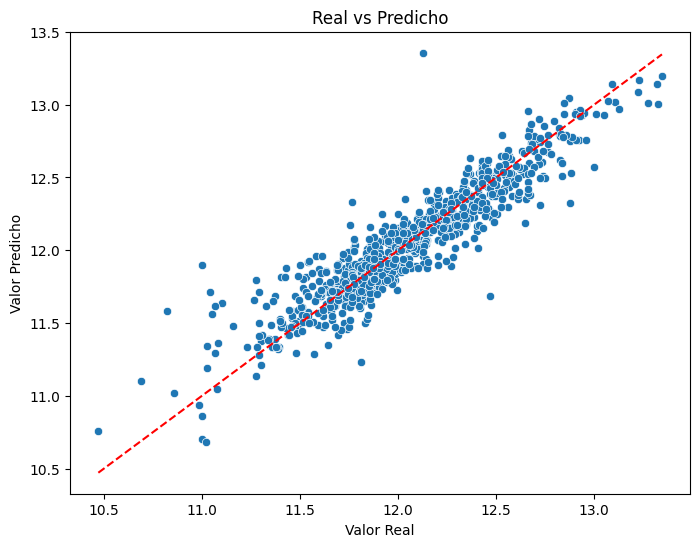

In [5]:
# ----------------------
# 4. Valor real vs predicho
# ----------------------
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel('Valor Real')
plt.ylabel('Valor Predicho')
plt.title('Real vs Predicho')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--')  # Línea ideal
plt.show()

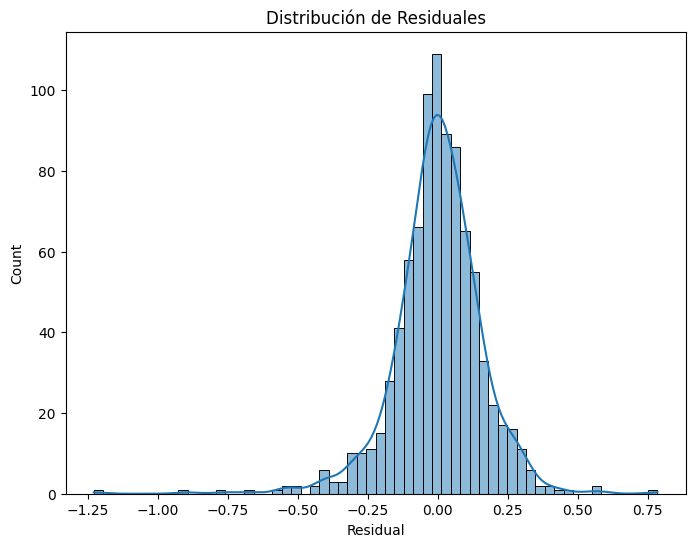

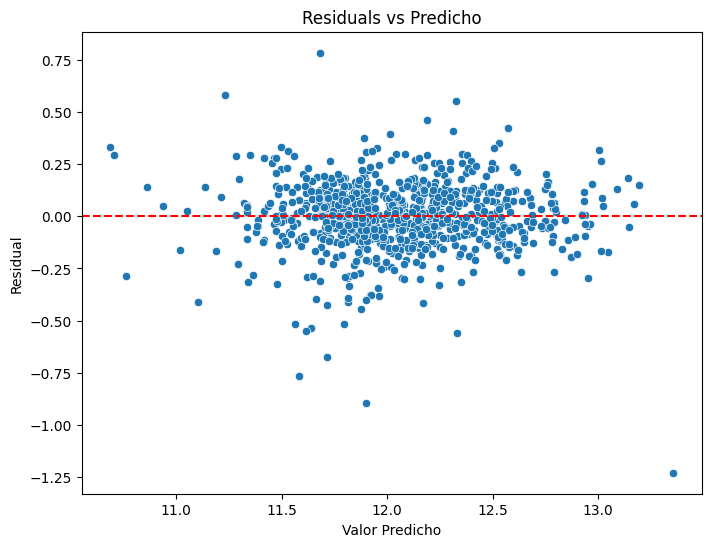

In [6]:
# ----------------------
# 5. Valores residuales
# ----------------------
residuals = y_test - y_pred
plt.figure(figsize=(8,6))
sns.histplot(residuals, kde=True)
plt.title('Distribución de Residuales')
plt.xlabel('Residual')
plt.show()

plt.figure(figsize=(8,6))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Valor Predicho')
plt.ylabel('Residual')
plt.title('Residuals vs Predicho')
plt.show()